In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

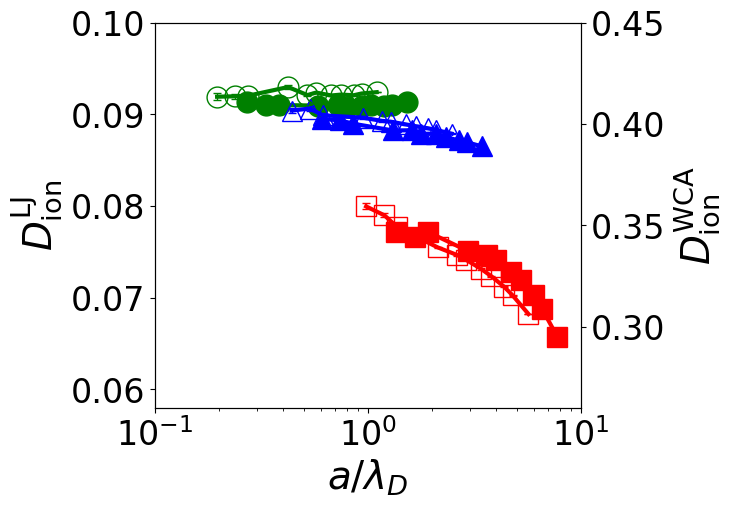

In [3]:
# ---------- Load Data ---------- #
x_df = pd.read_csv("a_lambda_D.csv")    # ← diffusion 데이터


file_path = "./"

# ---------- Compute averaged D + error propagation ---------- #
def avg_with_error(cat, ani, cat_err, ani_err):
    D_mean = 0.5 * (cat + ani)
    D_err = 0.5 * np.sqrt(cat_err**2 + ani_err**2)
    return D_mean, D_err

def load_dpp_dmm(eps, model):
    fname = f"{file_path}Diffusion_fit_MD_{eps}_{model}.csv"
    df = pd.read_csv(fname)

    D_cat = df["Dpp"].values          # D++
    D_cat_err = df["Dpp_err"].values
    D_ani = df["Dmm"].values          # D--
    D_ani_err = df["Dmm_err"].values

    return D_cat, D_cat_err, D_ani, D_ani_err

# ---------- Plot (same style as saved template) ---------- #
color_map = {'0.2': 'red', '1': 'blue', '5': 'green'}
marker_map = {'0.2': 's', '1': '^', '5': 'o'}

fig, ax1 = plt.subplots(figsize=(5.5, 5))
ax2 = ax1.twinx()

# ---------- LJ (filled markers) ----------
for eps in ['0.2', '1', '5']:
    D_cat, D_cat_err, D_ani, D_ani_err = load_dpp_dmm(eps, "LJ")
    key = eps.replace('.', '')
    D_mean, D_err = avg_with_error(D_cat, D_ani, D_cat_err, D_ani_err)
    ax1.plot(x_df[f"{eps}_LJ"], D_mean, color = color_map[eps], linestyle="-", linewidth=3, alpha=1)
    ax1.errorbar(
        x_df[f"{eps}_LJ"], D_mean, yerr=D_err,
        fmt=marker_map[eps], color=color_map[eps],
        mfc=color_map[eps], mec=color_map[eps], markersize=15,
        elinewidth=1, capsize=3, label=f"{eps} LJ"
    )

# ---------- WCA (open markers) ----------
for eps in ['0.2', '1', '5']:
    D_cat, D_cat_err, D_ani, D_ani_err = load_dpp_dmm(eps, "WCA")
    key = eps.replace('.', '')
    D_mean, D_err = avg_with_error(D_cat, D_ani, D_cat_err, D_ani_err)
    ax2.plot(x_df[f"{eps}_WCA"], D_mean, color = color_map[eps], linestyle="-", linewidth=3, alpha=1)
    ax2.errorbar(
        x_df[f"{eps}_WCA"], D_mean, yerr=D_err,
        fmt=marker_map[eps], color=color_map[eps],
        mfc='none', mec=color_map[eps], markersize=15,
        elinewidth=1, capsize=3, label=f"{eps} WCA"
    )

# ---------- Axes ----------
ax1.set_xlabel(r'$a/{\lambda_D}$', fontsize=28)
ax1.set_ylabel(r'$D_{\mathrm{ion}}^{\mathrm{LJ}}$', fontsize=28)
ax2.set_ylabel(r'$D_{\mathrm{ion}}^{\mathrm{WCA}}$', fontsize=28)
ax1.tick_params(axis='both', which='major', labelsize=24)
ax2.tick_params(axis='both', which='major', labelsize=24)
ax1.set_xscale("log")
ax1.set_ylim(0.058, 0.1)
ax2.set_ylim(0.26, 0.45)
ax1.set_xlim(0.1,10)

# ---------- Legend ----------
plt.show()
